# Lagrange polynomial interpolation



In [21]:
import numpy as np
import matplotlib.pyplot as plt
import time

## Lagrange Polynomial Interpolation Using the Barycentric Method

This section describes the implementation of the Lagrange polynomial interpolation using the barycentric form. The barycentric method is an efficient and numerically stable approach to computing Lagrange polynomials, particularly useful for interpolation.

### Function Overview

The `lagrange_barycentric` function performs polynomial interpolation using the barycentric form of the Lagrange interpolation formula. It is designed to handle interpolation efficiently, even when dealing with large datasets.

### Parameters

- **`x_known`**: Array-like, the x-coordinates of the known data points.
- **`y_known`**: Array-like, the y-coordinates corresponding to the known x-coordinates.
- **`x_eval`**: Array-like, the x-coordinates where the interpolation needs to be evaluated.

### Steps in the Method

1. **Compute Beta Coefficients**:
   - The beta coefficients are calculated to simplify the interpolation process. These coefficients help in reducing the computational complexity and improving the accuracy of the interpolation.

2. **Handle Exact Matches**:
   - The function checks if any of the evaluation points (`x_eval`) exactly match the known points (`x_known`). For such cases, the interpolation result is directly assigned from the known values to avoid indeterminate expressions.

3. **Evaluate the Interpolation**:
   - For the points where exact matches do not occur, the function calculates the interpolated values. It computes the numerator and denominator of the barycentric formula for each evaluation point, ensuring that the interpolation is performed efficiently.

4. **Return Interpolated Values**:
   - The function returns the interpolated y-values for the provided x-coordinates.

### Advantages

The barycentric form of Lagrange interpolation provides a more efficient and numerically stable approach compared to traditional methods. It reduces the complexity of computations and improves performance, making it suitable for applications where accuracy and efficiency are critical.

Here is the implementation of the barycentric Lagrange interpolation method:

In [22]:
def lagrange_barycentric(x_known, y_known, x_eval):
    """
    Perform Lagrange polynomial interpolation using the barycentric method.
    
    Parameters:
    - x_known: array-like, the x-coordinates of the known data points.
    - y_known: array-like, the y-coordinates of the known data points.
    - x_eval: array-like, the x-coordinates where the interpolation is to be evaluated.
    
    Returns:
    - y_eval: array-like, the interpolated y-values at the given x_eval points.
    """
    
    n = len(x_known)
    y_eval = np.zeros(len(x_eval))  # Array to store the interpolated y-values
    
    # Calculate the beta coefficients
    beta = np.zeros(n)
    for i in range(n):
        indices = np.arange(n) != i  # All indices except the current one
        beta[i] = 1.0 / np.prod(x_known[i] - x_known[indices])
    
    # Identify points in x_eval that match x_known to avoid division by zero
    forbidden_indices = []
    for i in range(n):
        Dx = x_eval - x_known[i]
        matches = np.where(Dx == 0)[0]  # Find indices where x_eval matches x_known[i]
        
        if len(matches) > 0:
            forbidden_indices.append(matches[0])
            y_eval[matches[0]] = y_known[i]  # Directly assign the known y value

    # Determine the indices of x_eval that can be safely interpolated
    allowed_indices = np.arange(len(x_eval))
    allowed_indices = np.delete(allowed_indices, forbidden_indices)
    
    # Evaluate the numerator and denominator for the Lagrange interpolation
    numerator = np.zeros(len(x_eval))
    denominator = np.zeros(len(x_eval))
    
    for i in range(n):
        term = beta[i] / (x_eval[allowed_indices] - x_known[i])
        numerator[allowed_indices] += term * y_known[i]
        denominator[allowed_indices] += term
    
    # Compute the interpolated y-values for allowed x_eval points
    y_eval[allowed_indices] = numerator[allowed_indices] / denominator[allowed_indices]
    
    return y_eval


## Lagrange Polynomial Interpolation Using Explicit Loops

In this section, we present an implementation of Lagrange polynomial interpolation using explicit loops. This method involves breaking down the interpolation process into straightforward iterative steps, which can be particularly useful for understanding the core principles of polynomial interpolation.

### Function Overview

The `lagrange_barycentric_loops` function performs Lagrange polynomial interpolation using a loop-based approach. This implementation explicitly computes each component of the interpolation formula, providing a clear and direct method for polynomial evaluation.

### Parameters

- **`x_known`**: Array-like, the x-coordinates of the known data points.
- **`y_known`**: Array-like, the y-coordinates corresponding to the known x-coordinates.
- **`x_eval`**: Array-like, the x-coordinates where the interpolation is to be evaluated.

### Steps in the Method

1. **Calculate Beta Coefficients**:
   - The function calculates the beta coefficients used in the Lagrange interpolation formula. These coefficients are computed through nested loops and are essential for evaluating the interpolation polynomial.

2. **Handle Exact Matches**:
   - It checks if any evaluation points (`x_eval`) exactly match the known points (`x_known`). For such points, the function directly assigns the corresponding known y-values to avoid issues with division by zero.

3. **Evaluate the Interpolation**:
   - For points where exact matches do not occur, the function computes the interpolation values. It uses nested loops to calculate the numerator and denominator of the Lagrange polynomial and updates the interpolated values accordingly.

4. **Return Interpolated Values**:
   - The function returns the interpolated y-values for the provided x-coordinates.

### Advantages

This explicit loop-based implementation of Lagrange interpolation provides a clear view of the computational steps involved. While it may not be as optimized as other methods, it offers a straightforward approach to understanding how Lagrange polynomials are calculated.

Here is the implementation of the Lagrange interpolation method using explicit loops:

In [23]:
def lagrange_barycentric_loops(x_known, y_known, x_eval):
    """
    Perform Lagrange polynomial interpolation using the explicit loops method.
    
    Parameters:
    - x_known: array-like, the x-coordinates of the known data points.
    - y_known: array-like, the y-coordinates of the known data points.
    - x_eval: array-like, the x-coordinates where the interpolation is to be evaluated.
    
    Returns:
    - y_eval: array-like, the interpolated y-values at the given x_eval points.
    """
    
    n = len(x_known)
    y_eval = np.zeros(len(x_eval))  # Array to store the interpolated y-values
    
    # Calculate the beta coefficients
    beta = np.ones(n)  # Initialize beta coefficients to 1
    for i in range(n):
        for j in range(n):
            if i != j:  # Only calculate when indices are different
                beta[i] = beta[i] / (x_known[i] - x_known[j])
    
    # Identify points in x_eval that match x_known to avoid division by zero
    forbidden_indices = []
    for k in range(len(x_eval)):  # For each x_eval point
        match_found = False  # Assume no match at first
        for i in range(n):
            if x_eval[k] == x_known[i]:
                match_found = True
                y_eval[k] = y_known[i]  # Directly use the known y value if x matches
                break
        
        forbidden_indices.append(match_found)
    
    # Evaluate the Lagrange polynomial for the points in x_eval
    for k in range(len(x_eval)):
        if not forbidden_indices[k]:
            numerator = 0.0
            denominator = 0.0
            
            for i in range(n):
                term = beta[i] / (x_eval[k] - x_known[i])
                numerator += term * y_known[i]
                denominator += term
            
            y_eval[k] = numerator / denominator
    
    return y_eval
        

We will perform a basic test of interpolation of an exponential function

Time for LagrangeBarycentric with explicit loops: 0.0020 seconds
Time for LagrangeBarycentric with optimizations: 0.0000 seconds


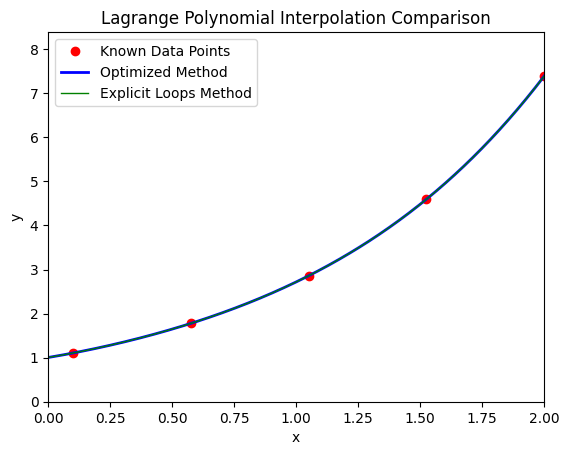

In [24]:
def plot_interpolation_comparison():
    # Generate 5 points following an exponential function
    x_known = np.linspace(0.1, 2.0, 5)
    y_known = np.exp(x_known)
    
    # Points to evaluate the interpolation
    x_eval = np.linspace(0.0, 2.0, 500)
    
    # Measure execution time for explicit loops method
    start_time = time.time()
    y_loops = lagrange_barycentric_loops(x_known, y_known, x_eval)
    time_loops = time.time() - start_time
    
    # Measure execution time for optimized method
    start_time = time.time()
    y_optimized = lagrange_barycentric(x_known, y_known, x_eval)
    time_optimized = time.time() - start_time
    
    print(f"Time for LagrangeBarycentric with explicit loops: {time_loops:.4f} seconds")
    print(f"Time for LagrangeBarycentric with optimizations: {time_optimized:.4f} seconds")
    
    # Plot results
    fig, ax = plt.subplots()
    ax.plot(x_known, y_known, 'ro', label='Known Data Points')
    ax.plot(x_eval, y_optimized, '-b', lw=2, label='Optimized Method')
    ax.plot(x_eval, y_loops, '-g', lw=1, label='Explicit Loops Method')
    ax.set_xlim((0, 2.0))
    ax.set_ylim((0, np.exp(2.0) + 1))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_title('Lagrange Polynomial Interpolation Comparison')
    ax.legend()
    
    plt.show()

# Run the plot comparison function
plot_interpolation_comparison()